In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-10-06 10:48:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../../Common/acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing

import acl
import cv2
from PIL import Image, ImageDraw

In [2]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][1:]

In [3]:
device_id = 0

img_path = "data/kite.jpg"
model_path = "model/yolov3.om"

In [4]:
# ACL Init
acl_resource = AclLiteResource()
acl_resource.init()

# Load Model
model = AclLiteModel(model_path, device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 2758080
malloc output 1, size 689520
malloc output 2, size 172380
Create model output dataset success
Init model resource success


In [5]:
img_org_bgr = cv2.imread(img_path)
data = preprocessing(img_org_bgr,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'input/input_data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
model output size 3
output  0
model output dims ({'name': 'pred_sbbox/concat_2:0', 'dimCount': 5, 'dims': [1, 52, 52, 3, 85]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'pred_mbbox/concat_2:0', 'dimCount': 5, 'dims': [1, 26, 26, 3, 85]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'pred_lbbox/concat_2:0', 'dimCount': 5, 'dims': [1, 13, 13, 3, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success
img_resized shape (416, 416, 3)


In [6]:
%timeit -n 10 -r 3
result_list = model.execute([data,]) 
bboxes = postprocessing(model, result_list, img_org_bgr, 0.3, 0.45)

In [7]:
img_out = Image.open(img_path)
img1 = ImageDraw.Draw(img_out)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
    print(bbox[:4], bbox[4], int(bbox[5]), coco_labels[int(bbox[5])])

[ 83.23046875 514.2890625  107.60546112 565.2734375 ] 0.9912185668945312 0 person
[117.76171112 613.109375   166.61328125 763.015625  ] 0.9853515625 0 person
[211.19920349 690.8046875  273.05078125 862.4453125 ] 0.974609375 0 person
[348.81640625 488.66357422 358.05859375 506.39892578] 0.9590234756469727 0 person
[522.58984375 506.64648438 540.16015625 533.10351562] 0.9533653259277344 0 person
[ 28.20898247 519.37988281  49.38476562 558.55761719] 0.9378318786621094 0 person
[178.65478516 548.19824219 193.26708984 571.98925781] 0.8181424140930176 0 person
[541.85498047 516.46630859 557.45751953 534.65869141] 0.45468616485595703 0 person
[594.19140625  85.6953125  671.68359375 155.3671875 ] 0.9824838638305664 33 kite
[280.68066406 237.44238281 307.16308594 286.37011719] 0.8850669860839844 33 kite
[576.875      349.31347656 601.25       372.74902344] 0.8186073303222656 33 kite
[470.76119995 341.90576172 486.36373901 362.28173828] 0.7829818725585938 33 kite
[308.43261719 379.93457031 326.1

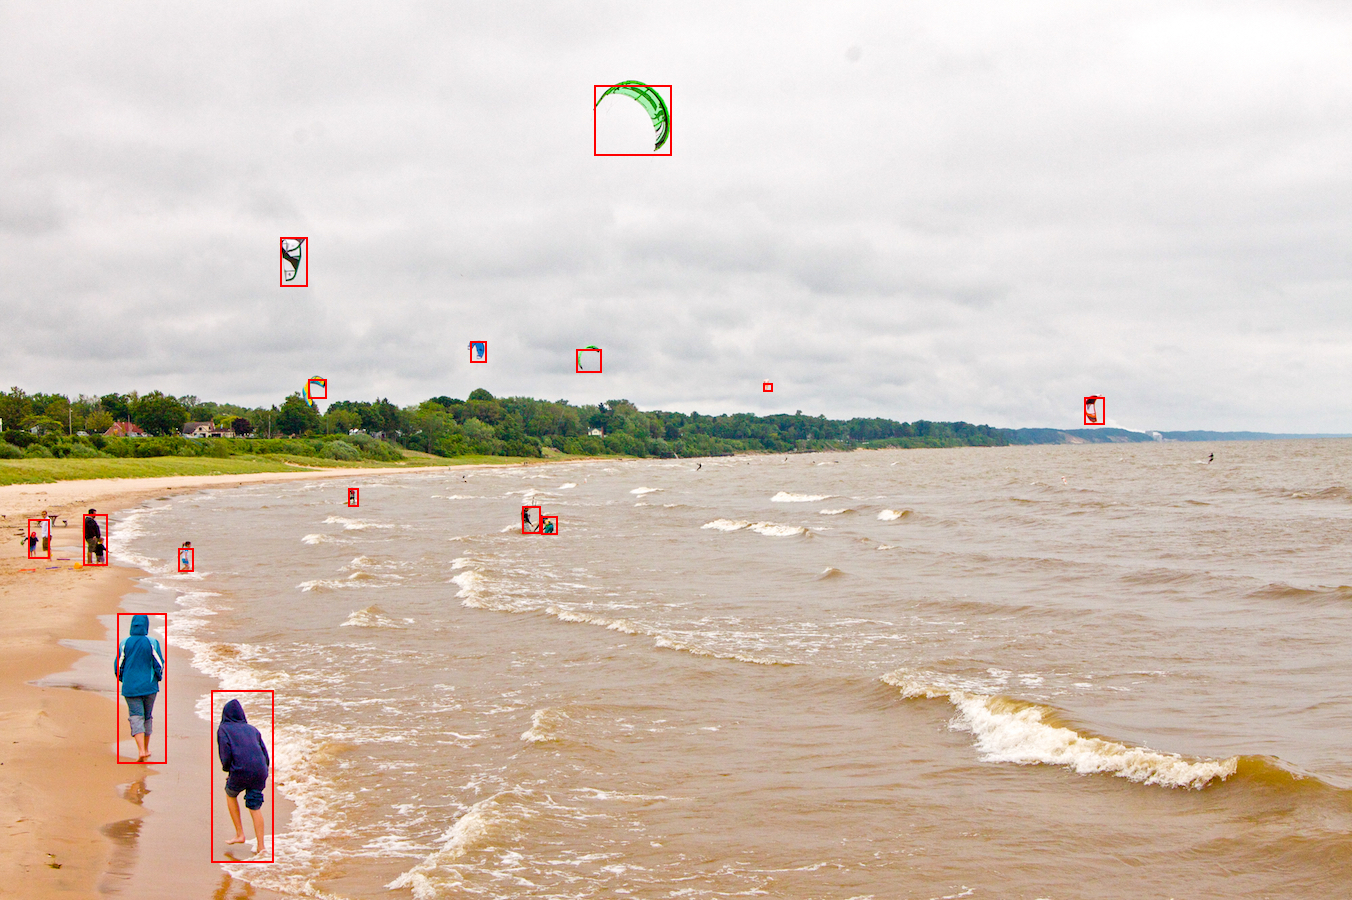

In [8]:
img_out